Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



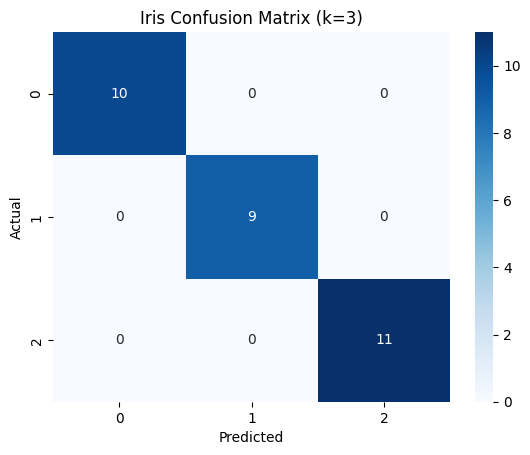

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
iris = pd.read_csv("iris (2).csv")
X = iris.drop("species", axis=1)
y = iris["species"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Evaluation
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Accuracy:", acc)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Iris Confusion Matrix (k=3)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Accuracy: 0.6948051948051948
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.80      0.77        99
           1       0.58      0.51      0.54        55

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.66       154
weighted avg       0.69      0.69      0.69       154



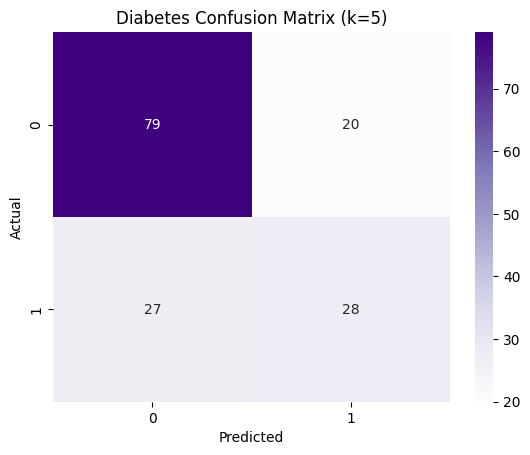

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
diabetes = pd.read_csv("diabetes.csv")
X = diabetes.drop("Outcome", axis=1)
y = diabetes["Outcome"]

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Evaluation
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Accuracy:", acc)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
sns.heatmap(cm, annot=True, cmap="Purples", fmt="d")
plt.title("Diabetes Confusion Matrix (k=5)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Best k = 6
Accuracy: 0.9344262295081968
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93        29
           1       0.97      0.91      0.94        32

    accuracy                           0.93        61
   macro avg       0.93      0.94      0.93        61
weighted avg       0.94      0.93      0.93        61



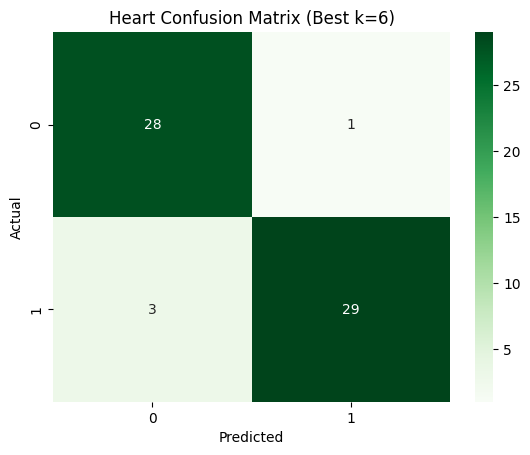

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
heart = pd.read_csv("heart.csv")
X = heart.drop("target", axis=1)
y = heart["target"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Find best k
best_k = 1
best_score = 0

for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    if score > best_score:
        best_score = score
        best_k = k

# Train best model
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Evaluation
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f"Best k = {best_k}")
print("Accuracy:", acc)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
sns.heatmap(cm, annot=True, cmap="Greens", fmt="d")
plt.title(f"Heart Confusion Matrix (Best k={best_k})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
